<a href="https://colab.research.google.com/github/Jaso10/Data_Cleaning/blob/gh-pages/Titanicku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns




# **Clasification**

Membaca dataset "**Titanic**" dari database seaborn

In [ ]:
titanic = sns.load_dataset('titanic')

# **Evaluasi Data**

Menampilkan bagian awal dari dataset

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Melihat dataframe

In [ ]:
titanic.shape

(891, 15)

Bisa terlihat banyak seklai data yag memiliki nilai ** *NaN* ** , ** *NaN* ** berbeda dengan **Nol** yang merupakan data dengan nilai **0** , ** *NaN* ** menunjukan tidak adanya data

Maka dari itu, di lihat berapa nilai yang memiliki * **NaN** * dengan *cell* berikut

In [ ]:
titanic.isnull().sum (axis = 0)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Terlihat nilai **NaN** banyak pada **Deck** maka dilakukan *Data Cleaning*

---

digunakan *copy* agar data itama tidak terganggu, jika ada kehilangan data karena proses pengolahan data.

In [ ]:
new_df = titanic.copy()

# Data Cleaning

Menghapus "deck" dan "embark_town"

In [ ]:
new_df = new_df.drop(columns = 'deck')
new_df = new_df.drop(columns = 'embark_town')

In [ ]:
new_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,yes,True


Menghapus kolom "pclass" "alive" dan "adult_male"

In [ ]:
new_df = new_df.drop(columns = 'pclass')
new_df = new_df.drop(columns = 'alive')
new_df = new_df.drop(columns = 'adult_male')

In [ ]:
new_df

,survived,sex,age,sibsp,parch,fare,embarked,class,who,alone
0,0,male,22.0,1,0,7.2500,S,Third,man,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False
2,1,female,26.0,0,0,7.9250,S,Third,woman,True
3,1,female,35.0,1,0,53.1000,S,First,woman,False
4,0,male,35.0,0,0,8.0500,S,Third,man,True
...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,S,Second,man,True
887,1,female,19.0,0,0,30.0000,S,First,woman,True
888,0,female,NaN,1,2,23.4500,S,Third,woman,False
889,1,male,26.0,0,0,30.0000,C,First,man,True


Melihat data NaN secara overall

In [ ]:
new_df.isnull().sum(axis = 0)

survived      0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
dtype: int64

Drop data NaN

In [ ]:
new_df = new_df.dropna()

Melihat data dengan nilai NaN

In [ ]:
new_df.shape

(712, 10)

# **DATA WRAGLING**

Dilihat dari dataset ini ada nilai *string* tetapi ada beberarapa data seperti *pc class* yang mengunakan angka tetapi menunjukan ada dan tidaknya orang, oleh sebab itu di **one_hot_encoding**

data encoding adalah menjadikan data satu kolom menjadi beberapa kolom, data menjadi data binner 1 dan 0 dimana nilai 1 adalah benar dan nilai 0 adaah salah. pada data wragling ini di gunaakan perintah **one_hot_encoding**

In [ ]:
pd.get_dummies(new_df['sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


maka bisa di gunakan fungsi berikut

In [ ]:
def one_hot_this (df,column_name):
 one_hot_data = pd.get_dummies(df[column_name])
 df = df.drop(columns = column_name)
 df = df.join(one_hot_data)
 return df


Digunakan one hot encoding pada kolom

In [ ]:
one_hot_class = ['sex','embarked','class','alone', 'who']

for i in one_hot_class:
  new_df = one_hot_this(new_df,i)

new_df.head()

,survived,age,sibsp,parch,fare,female,male,C,Q,S,First,Second,Third,False,True,child,man,woman
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1,1,0,0,1,0
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0,1,0,0,0,1
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1,0,1,0,1,0


# Splitting Data

ingin digunakan untuk memprediksi penumpang yang selamat

In [ ]:
x = new_df.drop(columns = 'survived')
y = pd.get_dummies(new_df['survived'])

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.33,random_state =32)

In [ ]:
np.shape(x)

(712, 17)

In [ ]:
np.shape(x)[1]

17

# Making ad Running in model

In [ ]:
#MAKING DNN MODEL-------------------------------------------START
model = keras.Sequential([
  keras.layers.Dense(330, activation=tf.nn.sigmoid, input_shape=[np.shape(x)[1]]),
  keras.layers.Dense(230, activation=tf.nn.sigmoid),
  keras.layers.Dense(220, activation=tf.nn.sigmoid),
  keras.layers.Dense(130, activation=tf.nn.sigmoid),
  keras.layers.Dense(140, activation=tf.nn.sigmoid),
  keras.layers.Dense(130, activation=tf.nn.sigmoid),
  keras.layers.Dense(160, activation=tf.nn.sigmoid),
  keras.layers.Dense(2, activation=tf.nn.softmax)
])
#MAKING DNN MODEL-------------------------------------------END

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device('/gpu:1'):
     history = model.fit(x_train, y_train,
              batch_size=20,
              epochs=300,
              verbose=1,
              shuffle = True,
     #         validation_split = 0.333
              validation_data = (x_test,y_test)
              )

Epoch 1/300
24/24 [==============================] - 1s 25ms/step - loss: 0.7308 - accuracy: 0.5416 - val_loss: 0.6868 - val_accuracy: 0.6000
Epoch 2/300
24/24 [==============================] - 0s 7ms/step - loss: 0.7032 - accuracy: 0.5789 - val_loss: 0.6775 - val_accuracy: 0.6000
Epoch 3/300
24/24 [==============================] - 0s 6ms/step - loss: 0.6724 - accuracy: 0.6103 - val_loss: 0.6708 - val_accuracy: 0.6000
Epoch 4/300
24/24 [==============================] - 0s 6ms/step - loss: 0.6654 - accuracy: 0.5973 - val_loss: 0.6302 - val_accuracy: 0.6723
Epoch 5/300
24/24 [==============================] - 0s 6ms/step - loss: 0.6222 - accuracy: 0.6901 - val_loss: 0.6128 - val_accuracy: 0.6723
Epoch 6/300
24/24 [==============================] - 0s 6ms/step - loss: 0.5938 - accuracy: 0.6885 - val_loss: 0.5955 - val_accuracy: 0.6809
Epoch 7/300
24/24 [==============================] - 0s 6ms/step - loss: 0.5783 - accuracy: 0.7011 - val_loss: 0.5849 - val_accuracy: 0.7064
Epoch 8/300


Loss History Plot


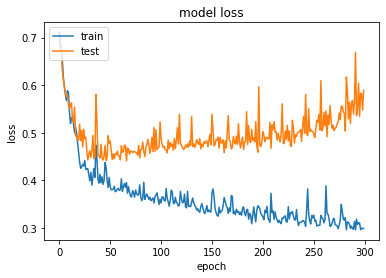

Acc History Plot


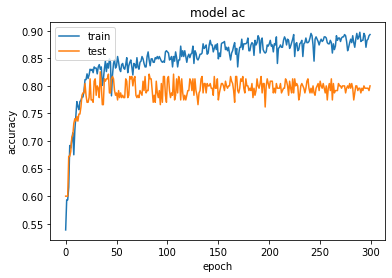

In [ ]:
#MAKING HISTORY--------------------------------------- START



# summarize history for loss
print('Loss History Plot') 
Loss_history = np.array([history.history['loss']])    
Val_Loss_history = np.array([history.history['val_loss']])    
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#MAKING HISTORY---------------------------------------END

#MAKING HISTORY--------------------------------------- START



# summarize history for loss
print('Acc History Plot') 
Acc_history = np.array([history.history['accuracy']])    
Val_Accuracy_history = np.array([history.history['val_accuracy']])    
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model ac')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#MAKING HISTORY---------------------------------------END

# Evaluating Programs

aquiring prediction by model

In [ ]:
from time import process_time 
t1_start = process_time()  

prediction = model.predict(x_test)

t1_stop = process_time() 

print("Elapsed time during the whole program in seconds:", 
                                         (t1_stop-t1_start)/np.shape(x_test)[0])  

Elapsed time during the whole program in seconds: 0.0007060224893616892


In [ ]:
y_pred = np.argmax(prediction,axis=1)
y_true = np.argmax(y_test.values,axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

acc = accuracy_score(y_pred,y_true)
macro_precision = precision_score(y_true, y_pred, average='macro')
micro_precision = precision_score(y_true, y_pred, average='micro') 
macro_recall = recall_score(y_true, y_pred, average='macro')
micro_recall = recall_score(y_true, y_pred, average='micro')

print('Accuracy = ' + str(acc))
print('macro_precision = ' + str(macro_precision))
print('micro_precision = ' + str(micro_precision))
print('macro_recall = ' + str(macro_recall))
print('micro_recall = ' + str(micro_recall))

Accuracy = 0.8
macro_precision = 0.7923153235653235
micro_precision = 0.8
macro_recall = 0.7890070921985816
micro_recall = 0.8


Creating ROC Curve 

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(2):
    fpr[i],tpr[i], _ = roc_curve(y_test.values[:,i], prediction[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"],tpr["micro"], _ = roc_curve(y_test.values.ravel(),prediction.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

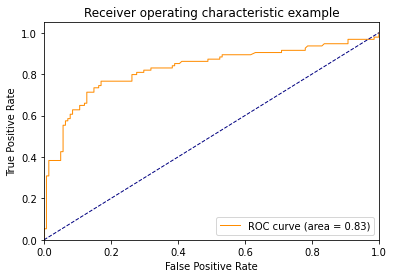

In [ ]:
plt.figure()
lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
# plt.savefig('/gdrive/My Drive/ROC.png')
plt.show()

# **REGRASSION**

Import Library

In [ ]:
(x_train,y_train), (x_test,y_test) = keras.datasets.boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


Import Dataset

In [ ]:
x_train_max = np.zeros(13)
for n in range (0,13):
      x_train_max[n] = np.max(x_train[:,n])
      x_train[:,n] = x_train[:,n]/x_train_max[n]

y_train_max = np.max(y_train)
y_train = y_train/y_train_max

for n in range (0,13):
      x_test[:,n] = x_test[:,n]/x_train_max[n]

y_test = y_test/y_train_max

Normalization on both input and output

In [ ]:
#MAKING DNN MODEL-------------------------------------------START

model = keras.Sequential([
  keras.layers.Dense(330, activation=tf.nn.relu, input_shape=[13]),
  keras.layers.Dense(230, activation=tf.nn.relu),
  keras.layers.Dense(220, activation=tf.nn.relu),
  keras.layers.Dense(200, activation=tf.nn.relu),
  keras.layers.Dense(130, activation=tf.nn.relu),
  keras.layers.Dense(130, activation=tf.nn.relu),
  keras.layers.Dense(130, activation=tf.nn.relu),
  keras.layers.Dense(1)
])

Show Keras Model

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 330)               4620      
_________________________________________________________________
dense_9 (Dense)              (None, 230)               76130     
_________________________________________________________________
dense_10 (Dense)             (None, 220)               50820     
_________________________________________________________________
dense_11 (Dense)             (None, 200)               44200     
_________________________________________________________________
dense_12 (Dense)             (None, 130)               26130     
_________________________________________________________________
dense_13 (Dense)             (None, 130)               17030     
_________________________________________________________________
dense_14 (Dense)             (None, 130)              

Compiling Model

In [ ]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              #metrics=['mean_absolute_error']
              )

Set Epoch Number

In [ ]:
epochs_num = 1350

Train

In [ ]:


with tf.device('/gpu:1'):
     history = model.fit(x_train, y_train,
                         batch_size = 20,
                         epochs=epochs_num,
                         verbose=1,
                         shuffle = True,
                         validation_data = (x_test,y_test)
                         )

Epoch 1/1350
21/21 [==============================] - 1s 12ms/step - loss: 0.1152 - val_loss: 0.0265
Epoch 2/1350
21/21 [==============================] - 0s 6ms/step - loss: 0.0257 - val_loss: 0.0187
Epoch 3/1350
21/21 [==============================] - 0s 6ms/step - loss: 0.0142 - val_loss: 0.0438
Epoch 4/1350
21/21 [==============================] - 0s 6ms/step - loss: 0.0286 - val_loss: 0.0154
Epoch 5/1350
21/21 [==============================] - 0s 6ms/step - loss: 0.0110 - val_loss: 0.0172
Epoch 6/1350
21/21 [==============================] - 0s 7ms/step - loss: 0.0085 - val_loss: 0.0121
Epoch 7/1350
21/21 [==============================] - 0s 6ms/step - loss: 0.0064 - val_loss: 0.0140
Epoch 8/1350
21/21 [==============================] - 0s 6ms/step - loss: 0.0065 - val_loss: 0.0103
Epoch 9/1350
21/21 [==============================] - 0s 6ms/step - loss: 0.0059 - val_loss: 0.0121
Epoch 10/1350
21/21 [==============================] - 0s 6ms/step - loss: 0.0050 - val_loss: 0.013

making history

Loss History Plot


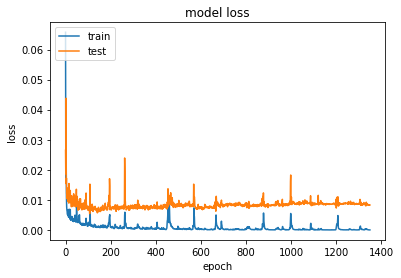

In [ ]:
#MAKING HISTORY--------------------------------------- START



# summarize history for loss
print('Loss History Plot') 
Loss_history = np.array([history.history['loss']])    
Val_Loss_history = np.array([history.history['val_loss']])    
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#MAKING HISTORY---------------------------------------END

running predictions
Predictions Finnis Running


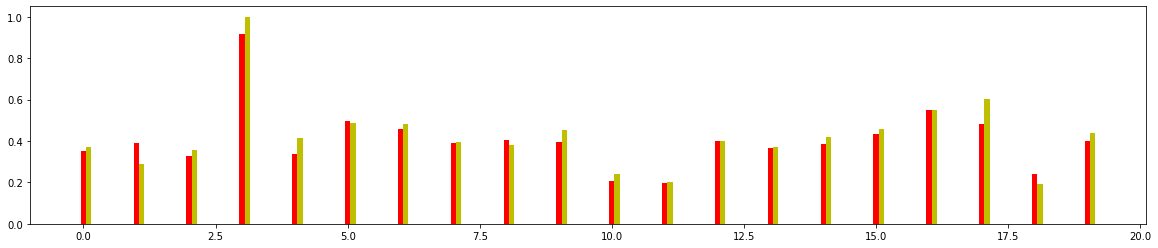

In [ ]:
print('running predictions')
predictions = model.predict([x_test])
predictions = predictions
print('Predictions Finnis Running')

fiq, ax = plt.subplots(figsize = (20,4))

start = 10
end = 30

ind =np.arange(len(predictions[start:end,0]))
width = 0.1

prediction_data = ax.bar(ind, predictions[start:end,0],width, color='r')
actual_data = ax.bar(ind + width, y_test[start:end], width, color='y')
